In [2]:
#데이터 불러오기
#데이터 확인1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

power_csv = pd.read_csv('./dataset.csv', thousands=',', encoding= 'cp949')
power_csv

,date,Usage_power_total,product_1,product_2,product_total,Temp.,Humidity
0,2017-01-01,6095.70,0.0,0.00,0.00,1.1,73.000000
1,2017-01-02,9962.15,19399.4,1411.00,20810.40,2.5,67.000000
2,2017-01-03,11196.00,20456.6,1802.00,22258.60,4.1,56.000000
3,2017-01-04,12146.23,20003.6,2092.00,22095.60,4.3,67.583333
4,2017-01-05,12156.81,20256.1,2026.00,22282.10,2.3,71.541667
...,...,...,...,...,...,...,...
1643,2021-07-30,16418.70,0.0,0.00,0.00,26.7,80.958333
1644,2021-07-31,8942.10,0.0,0.00,0.00,26.8,79.583333
1645,2021-08-01,6092.81,0.0,0.00,0.00,25.8,90.500000
1646,2021-08-02,13881.39,16043.4,3973.20,20016.60,25.5,89.333333


In [3]:
#데이터 확인2; 10개 행만 보기

power_csv.head(10)

,date,Usage_power_total,product_1,product_2,product_total,Temp.,Humidity
0,2017-01-01,6095.70,0.0,0.0,0.0,1.1,73.000000
1,2017-01-02,9962.15,19399.4,1411.0,20810.4,2.5,67.000000
2,2017-01-03,11196.00,20456.6,1802.0,22258.6,4.1,56.000000
3,2017-01-04,12146.23,20003.6,2092.0,22095.6,4.3,67.583333
4,2017-01-05,12156.81,20256.1,2026.0,22282.1,2.3,71.541667
5,2017-01-06,12567.21,20458.6,2066.0,22524.6,0.9,75.791667
6,2017-01-07,11841.19,17333.7,2088.0,19421.7,1.0,72.458333
7,2017-01-08,6546.90,0.0,0.0,0.0,6.7,62.333333
8,2017-01-09,9958.82,18491.9,1311.0,19802.9,3.5,51.083333
9,2017-01-10,12070.07,20206.2,1745.0,21951.2,-1.6,40.583333


In [4]:
#데이터 확인3
#(51,7)의 뜻: 샘플 51개, feature 7개

power_csv.shape

(1648, 7)

In [4]:
#데이터 확인4

print(power_csv.head())

         date  Usage_power_total  product_1  product_2  product_total  Temp.  \
0  2017-01-01            6095.70        0.0        0.0            0.0    1.1   
1  2017-01-02            9962.15    19399.4     1411.0        20810.4    2.5   
2  2017-01-03           11196.00    20456.6     1802.0        22258.6    4.1   
3  2017-01-04           12146.23    20003.6     2092.0        22095.6    4.3   
4  2017-01-05           12156.81    20256.1     2026.0        22282.1    2.3   

    Humidity  
0  73.000000  
1  67.000000  
2  56.000000  
3  67.583333  
4  71.541667  


In [5]:
#Split the dataset; 학습을 위한 train set과 성능검증을 위한 test set 분리
#X: Input array, y: Output array

from sklearn.model_selection import train_test_split

X = power_csv.drop(['date', 'Usage_power_total'], axis=1)
y = power_csv['Usage_power_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1153, 5) (495, 5) (1153,) (495,)


In [6]:
X_train

,product_1,product_2,product_total,Temp.,Humidity
396,15886.70,1922.00,17808.70,-3.0,43.375000
1103,15080.00,1838.00,16918.00,-6.0,60.333333
777,0.00,0.00,0.00,5.0,59.000000
298,18628.10,2026.20,20654.30,10.0,75.000000
1508,21794.95,4507.97,26302.92,8.1,67.125000
...,...,...,...,...,...
715,19640.00,1712.00,21352.00,-4.0,80.708333
905,20124.80,1747.00,21871.80,27.0,74.916667
1096,20865.00,1714.00,22579.00,3.0,81.666667
235,16170.40,2287.00,18457.40,26.0,80.875000


In [7]:
print(X)

      product_1  product_2  product_total  Temp.   Humidity
0           0.0       0.00           0.00    1.1  73.000000
1       19399.4    1411.00       20810.40    2.5  67.000000
2       20456.6    1802.00       22258.60    4.1  56.000000
3       20003.6    2092.00       22095.60    4.3  67.583333
4       20256.1    2026.00       22282.10    2.3  71.541667
...         ...        ...            ...    ...        ...
1643        0.0       0.00           0.00   26.7  80.958333
1644        0.0       0.00           0.00   26.8  79.583333
1645        0.0       0.00           0.00   25.8  90.500000
1646    16043.4    3973.20       20016.60   25.5  89.333333
1647    21931.8    6115.52       28047.32   26.1  86.083333

[1648 rows x 5 columns]


In [8]:
print(y)

0        6095.70
1        9962.15
2       11196.00
3       12146.23
4       12156.81
          ...   
1643    16418.70
1644     8942.10
1645     6092.81
1646    13881.39
1647    16272.04
Name: Usage_power_total, Length: 1648, dtype: float64


In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1153, 5) (1153,)
(495, 5) (495,)


In [10]:
#Build MLP structure(with 2 hidden layers using Keras)
#activation 'relu': powerful in deep NN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

mlp_model = Sequential()
mlp_model.add(Dense(500, activation='relu', input_shape=(5,)))
mlp_model.add(Dense(250, activation='relu'))
mlp_model.add(Dense(100, activation='softmax'))

mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25100     
Total params: 153,350
Trainable params: 153,350
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Build Loss func. and optimizer

sgd = SGD(lr=0.005)
mlp_model.compile(loss= 'mse', optimizer=sgd, metrics=['accuracy'])

In [12]:
#Train and Evaluation of the MLP model

model_history = mlp_model.fit(X_train, y_train, epochs=80, batch_size=256, verbose=2, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/80
5/5 - 0s - loss: nan - accuracy: 0.0121 - val_loss: nan - val_accuracy: 0.0061
Epoch 2/80
5/5 - 0s - loss: nan - accuracy: 0.0156 - val_loss: nan - val_accuracy: 0.0061
Epoch 3/80
5/5 - 0s - loss: nan - accuracy: 0.0156 - val_loss: nan - val_accuracy: 0.0061
Epoch 4/80
5/5 - 0s - loss: nan - accuracy: 0.0156 - val_loss: nan - val_accuracy: 0.0061
Epoch 5/80
5/5 - 0s - loss: nan - accuracy: 0.0156 - val_loss: nan - val_accuracy: 0.0061
Epoch 6/80
5/5 - 0s - loss: nan - accuracy: 0.0156 - val_loss: nan - val_accuracy: 0.0061
Epoch 7/80
5/5 - 0s - loss: nan - accuracy: 0.0156 - val_loss: nan - val_accuracy: 0.0061
Epoch 8/80
5/5 - 0s - loss: nan - accuracy: 0.0156 - val_loss: nan - val_accuracy: 0.0061
Epoch 9/80
5/5 - 0s - loss: nan - accuracy: 0.0156 - val_loss: nan - val_accuracy: 0.0061
Epoch 10/80
5/5 - 0s - loss: nan - accuracy: 0.0156 - val_loss: nan - val_accuracy: 0.0061
Epoch 11/80
5/5 - 0s - loss: nan - accuracy: 0.0156 - val_loss: nan - val_accuracy: 0.0061
Epoch 12

In [13]:
#Dictionary of trining and evaluation history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


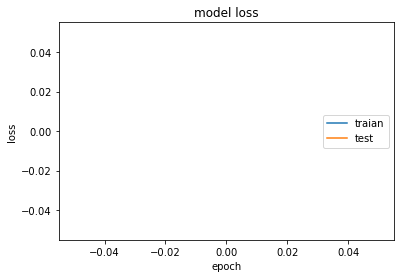

In [14]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['traian', 'test'], loc='right')
plt.show()

#loss 값이 0에 가까워질수록 정확도 올라감

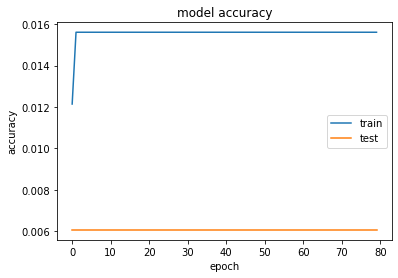

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()